In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import lasso_path, enet_path
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
plt.rcParams['figure.figsize'] = [15, 10]

In [53]:
data = pd.read_csv('test_data.csv', index_col='IDX')
data.DATES = pd.to_datetime(data.DATES, format='%Y-%m-%d')
#data = pd.read_csv('t1_v2.csv', index_col='IDX')
#data.DATES = pd.to_datetime(data.DATES, format='%d-%b-%Y')

In [54]:
data.shape

(600, 3)

In [55]:
data.describe()

,VOL,DURATION
count,600.000000,600.000000
mean,1799.711667,101.171617
std,629.184759,68.286145
min,900.000000,2.580000
25%,1245.500000,54.290000
50%,1704.000000,82.225000
75%,2303.500000,130.917500
max,3000.000000,299.070000


In [32]:
data.head()

,DATES,VOL,DURATION
IDX,,,
1,2018-02-20,920,19.09
2,2018-02-21,1010,25.02
3,2018-02-22,966,26.50
4,2018-02-23,977,50.20
5,2018-02-24,905,13.99


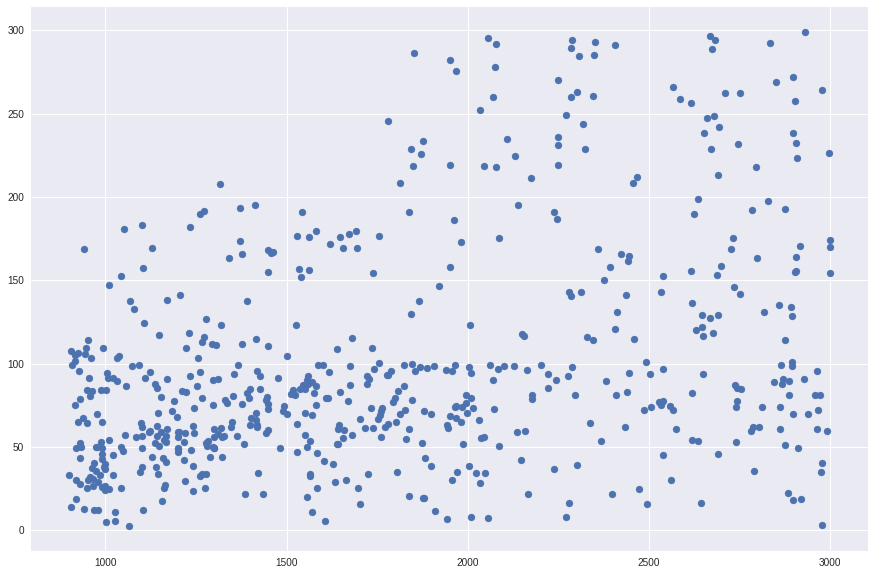

In [33]:
plt.scatter(data.VOL, data.DURATION)
plt.show()

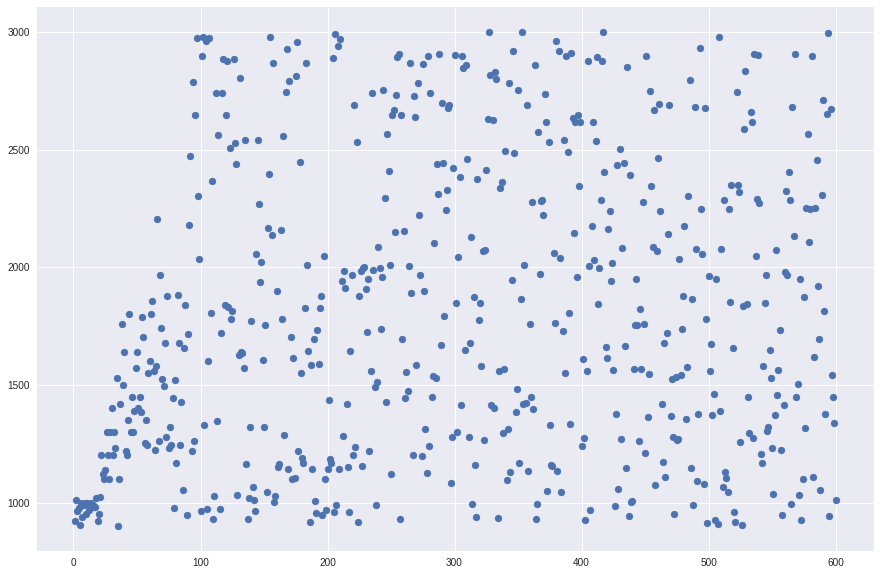

In [34]:
plt.scatter(data.index, data.VOL)
plt.show()

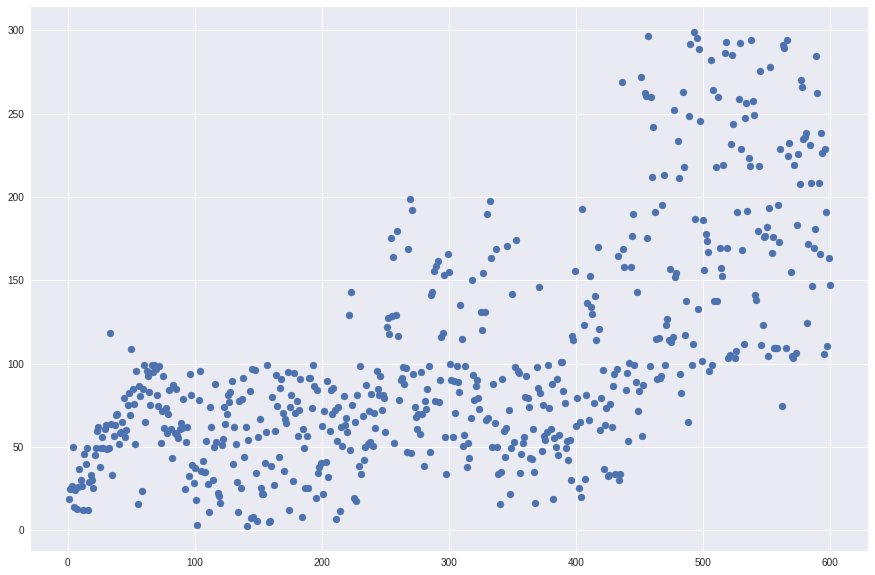

In [35]:
plt.scatter(data.index, data.DURATION)
plt.show()

In [36]:
X = data.drop(['DATES','DURATION'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, data.DURATION, test_size=0.25,random_state=5)

# Ordinary Least Squares

In [37]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
y_pred = lm.predict(x_test)

In [39]:
print ('Estimated incercept coefficient: ', lm.intercept_)

Estimated incercept coefficient:  29.83188914993231


In [40]:
print ('Number of coefficients: ', len(lm.coef_))

Number of coefficients:  1


In [57]:
print('Linear Regression Coef: ',lm.coef_)

Linear Regression Coef:  [0.03763078]


In [42]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 4496.61


In [43]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.15


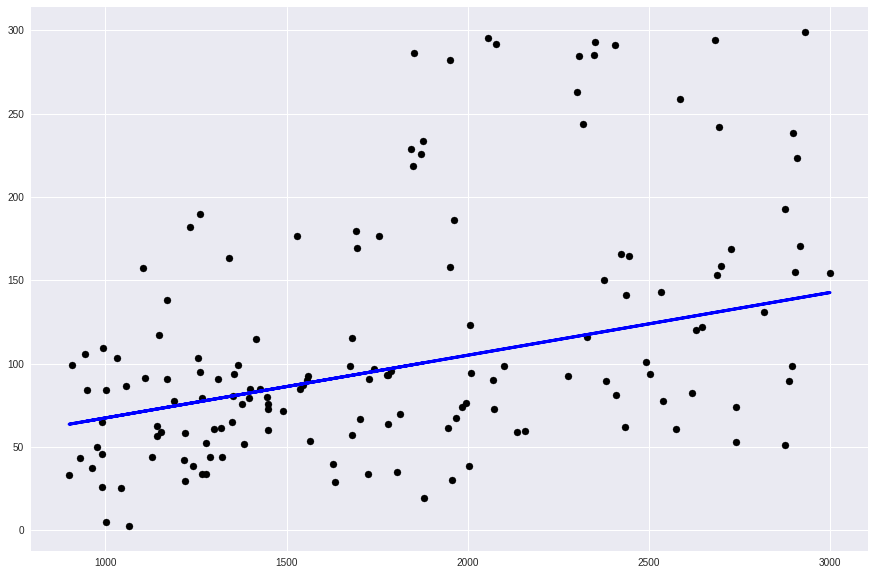

In [46]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
# plt.xticks(())
# plt.yticks(())

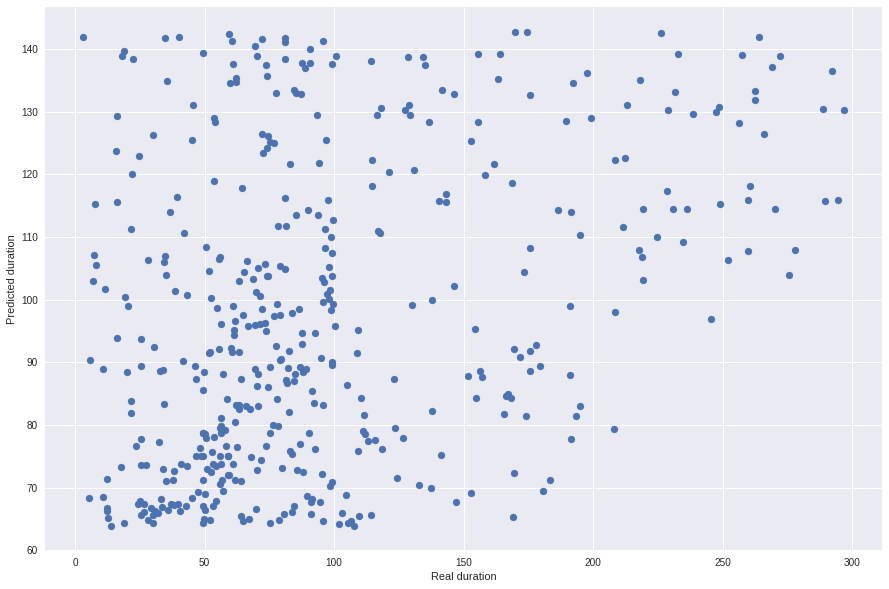

In [47]:
plt.scatter(y_train, lm.predict(x_train))
plt.xlabel("Real duration")
plt.ylabel("Predicted duration");

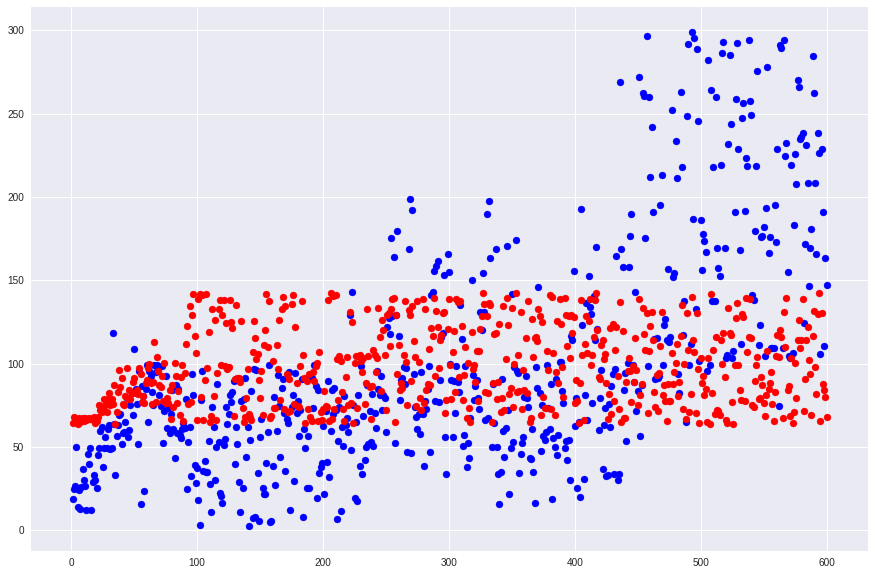

In [50]:
plt.scatter(data.index, data.DURATION,color='blue')
plt.scatter(data.index, lm.predict(X),color='red')
plt.show()

# Ridge Regression

In [56]:
reg = Ridge(alpha = .5)
reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
print('Ridge Regression Coef: ',reg.coef_)

Ridge Regression Coef:  [0.03763078]


In [59]:
print ('Estimated incercept coefficient: ', reg.intercept_)

Estimated incercept coefficient:  29.8318893348646


In [61]:
reg_y_pred = reg.predict(x_test)

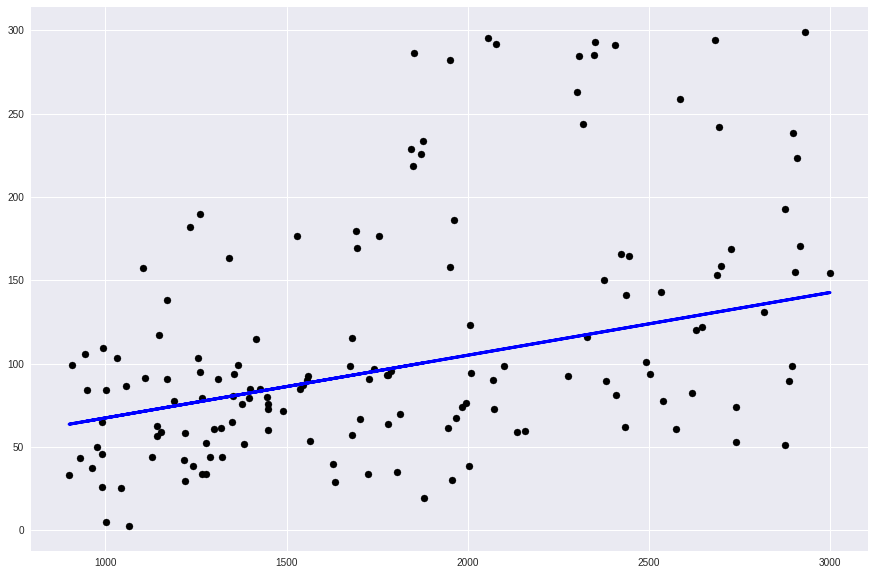

In [62]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, reg_y_pred, color='blue', linewidth=3)

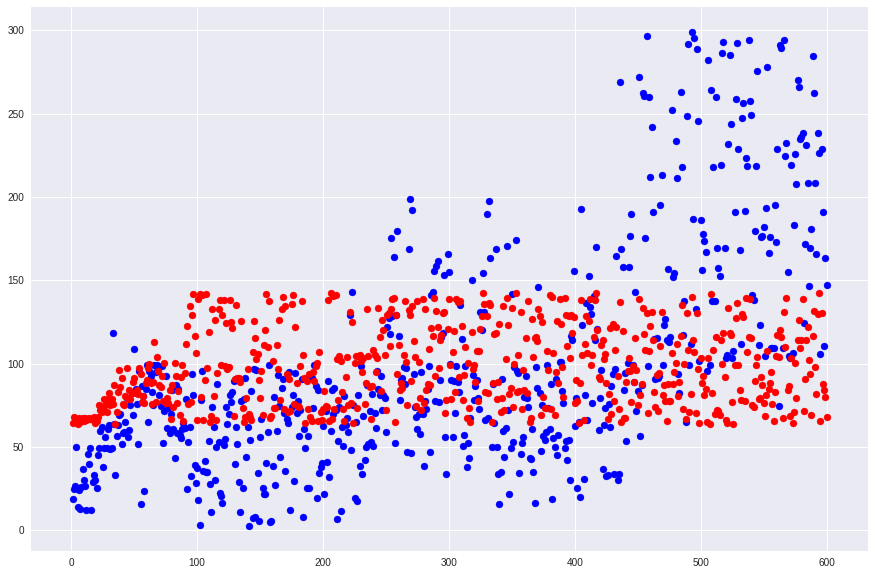

In [63]:
plt.scatter(data.index, data.DURATION,color='blue')
plt.scatter(data.index, reg.predict(X),color='red')
plt.show()

In [80]:
n_alphas = 200
# alphas = np.logspace(-10, -2, n_alphas)
alphas = np.logspace(-1, 20, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)

In [81]:
coefs

[array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235277]),
 array([0.05235276]),
 array([0.05235276]),
 array([0.05235276]),
 array([0.05235276]),
 array([0.05235275]),
 array([0.05235275]),
 array([0.05235274]),
 array([0.05235274]),
 array([0.05235273]),
 array([0.05235272]),
 array([0.0523527]),
 array([0.05235268]),
 array([0.05235266]),
 array([0.05235263]),
 array([0.0

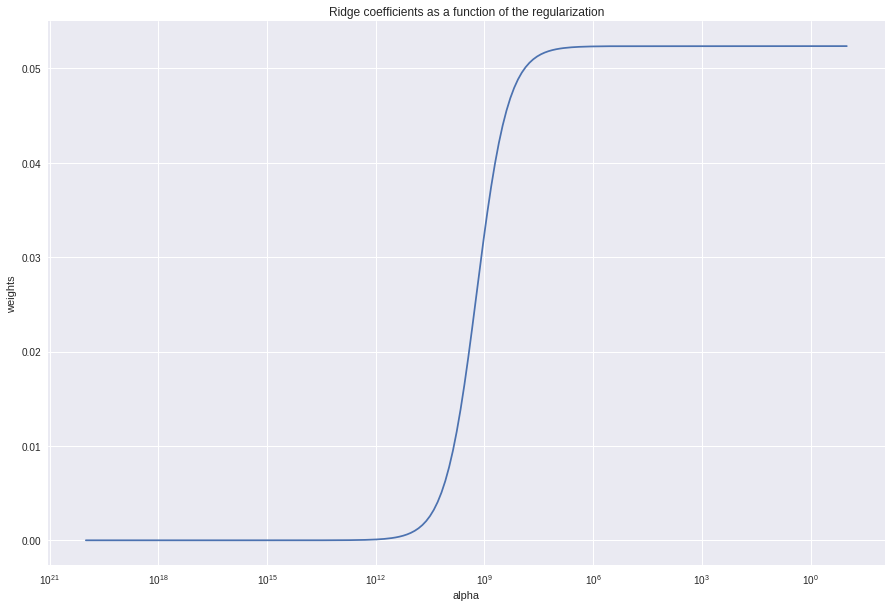

In [82]:
# Display results
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Lasso and Elastic Net